## Support Vector Machine, SVM
- Reference <a href='https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html'>Python Data Science Handbook</a>
- Reference <a href='https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-kernel-%E5%87%BD%E6%95%B8-47c94095171'>機器學習: Kernel 函數</a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize']=[7,5]

- sklearn.datasets 的 make_blobs 內建函數用以產生分群資料點

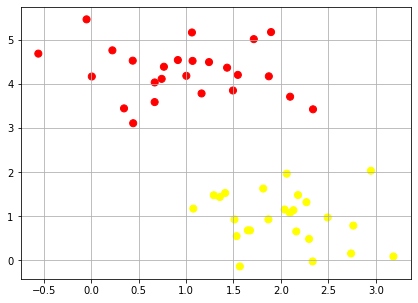

In [35]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.grid(True)

- 想要畫一條區隔線，嘗試去有效分類兩群資料。
- 在二維的平面可以很容易畫出區隔線，但是，只會有一條線分隔出兩群資料嗎?

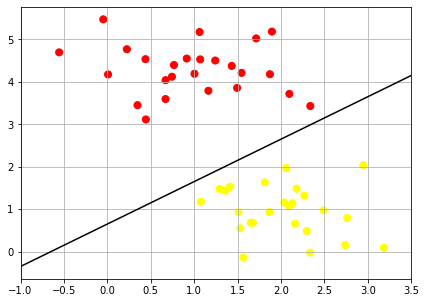

In [37]:
xfit = np.linspace(-1, 3.5)  # x 軸資料範圍
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot(0.6, 2.1, marker='x', c='g', markeredgewidth=3, markersize=10)
   
#for w0, w1 in [(0.65, 1), (1.6, 0.5), (2.9, -0.2)]:  # w0 是截距; w1是斜率
plt.plot(xfit, 0.65 + 1 * xfit, '-k')             # 畫出斜率線

plt.xlim(-1, 3.5)
plt.grid(True)

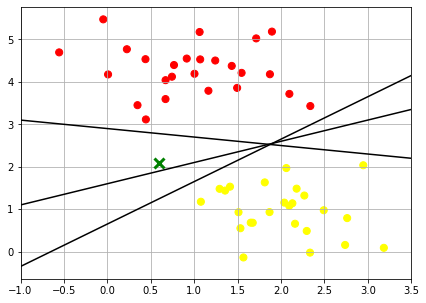

In [38]:
xfit = np.linspace(-1, 3.5)  # x 軸資料範圍
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot(0.6, 2.1, marker='x', c='g', markeredgewidth=3, markersize=10)
   
for w0, w1 in [(0.65, 1), (1.6, 0.5), (2.9, -0.2)]:  # w0 是截距; w1是斜率
    plt.plot(xfit, w0 + w1 * xfit, '-k')             # 畫出斜率線

plt.xlim(-1, 3.5)
plt.grid(True)

- 上述的三條分隔線顯然都能有效區分不同顏色的兩個類型資料。
- 但是，仔細觀察上圖綠色的 **<font color='green'>X</font>** 標記點，這個點到底會被劃分至紅色群的資料，還是黃色群的資料，顯然會因為不同的分隔線而有不同的結果。
- 換句話說，畫一條分隔線去分類不同群體的資料的作法不盡完善，應該還有其它更好的方法。

### 支持向量機 (Support Vector Machines, SVM): Maximizing the Margin
- 支持向量機演算法改善用單一條區隔線的分類方法。
- 此方法是不再僅畫一條線條，而是在每一線條上畫上左右一定寬度的邊界(margin)，大小則是延伸接觸至最靠近的點為止。

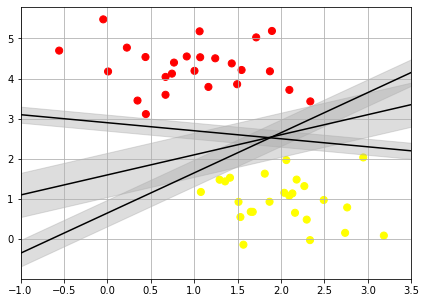

In [39]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#w0, w1, d = 0.65, 1, 0.33
#w0, w1, d = 1.6, 0.5, 0.55
#w0, w1, d = 2.9, -0.2, 0.2
for w0, w1, d in [(0.65, 1, 0.33), (1.6, 0.5, 0.55), (2.9, -0.2, 0.2)]:  # w0 是截距; w1是斜率
    yfit = w0 + w1 * xfit
    plt.plot(xfit, yfit, '-k')             # 畫出斜率線
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.grid(True)

- 當有多條分隔線都可以分隔資料的不同類群，支持向量機的最佳模型是那一條有著最大邊距(margin) 的分隔線。
- 所以，支持向量機有一個名為 <font color='red'>maximum margin estimator</font> 的稱號。

### 擬合支持向量機

- sklearn.svm 模組的 SVC 模型以 `C` 的參數調控邊距大小。
- sklearn.svm 模組的 SVC 模型以 `gamma` 參數決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')。

In [40]:
# 支持向量機的簡稱是 SVM，但 sklearn 的函數名稱是 SVC(Support vector classifier)
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [41]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)    # 大寫 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    #if plot_support:
    #    ax.scatter(model.support_vectors_[:, 0],
    #               model.support_vectors_[:, 1],
    #               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [16]:
print(X.shape, y.shape)

(50, 2) (50,)


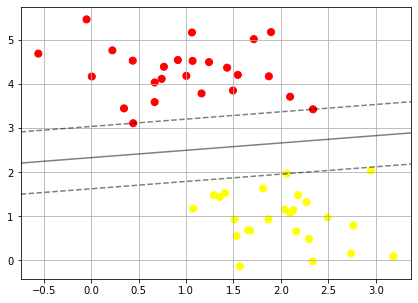

In [42]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.grid(True)

- 上面展示的分隔線最大化了兩類群資料的邊距(margin)。從圖上可以明顯看見幾個訓練資料剛好接觸到分隔線。
- 那些剛好接觸到分隔線的資料點被稱為<font color='red'>支持向量(Support Vectors)</font>。
- 一個 SVC 分類模型會由這些點來決定分類的成敗，所以這些接觸到 Margin 的點在 SVC 模型扮演重要的角色。
- 在 sklearn 的 SVC 模型，這些點被儲存在模型的`support_vectors_`參數。

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- 支持向量機分類器的重點是找出的分隔線能有效擬合那些支持向量資料點。

## SVM - kernel for nonlinear 

- SVM 分類器最出色之處是內建不同的核函數(`kernels`)。
- 前述範例是採用線性的 `linear` 核函數，但資料若非以線性方式分布，例如資料是以環狀的方式排列(請參考下面範例)，線性的分隔方式無法解決分類的問題。

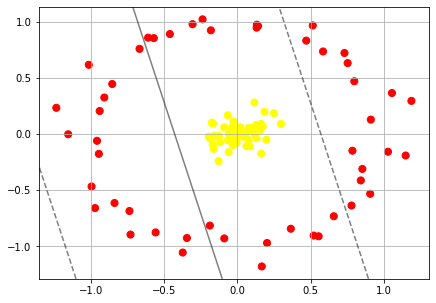

In [43]:
# 以 sklearn.datasets 的 make_circles 函數產生 100 個環繞分布的 nonlinear 資料點，
# 再嘗試用 SVM 以 linear 的方式畫出分隔線。
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False) 
plt.grid(True)

- 上述資料分成黃色與與紅色別，前者以不規則型態分布在原點(0,0)周圍，紅色資料則以環狀方式不規則散落排列在外圈。
- 很明顯地，線性的方式無法分隔上述環狀散布的非線性資料。
- 對於此類非線性排列的資料，SVM 的作法是將資料投影到較高的維度，也就是說，SVM 的做法是利用其核函數(`kernels`)，將非線性的資料投影至高維度空間。如此一來，便有可能以線性的方式分類非線性的資料。
- 例如，若是將資料點提升一個維度(計算`徑向基函數核`, `Radial Basis Function`，請<a href='https://zh.wikipedia.org/zh-tw/%E5%BE%84%E5%90%91%E5%9F%BA%E5%87%BD%E6%95%B0%E6%A0%B8'>參考</a>)，也就是將目前的 x 和 y 座標加入 z 軸座標，重新將資料叢(類群)投影如下圖:

Text(0.5, 0, 'z')

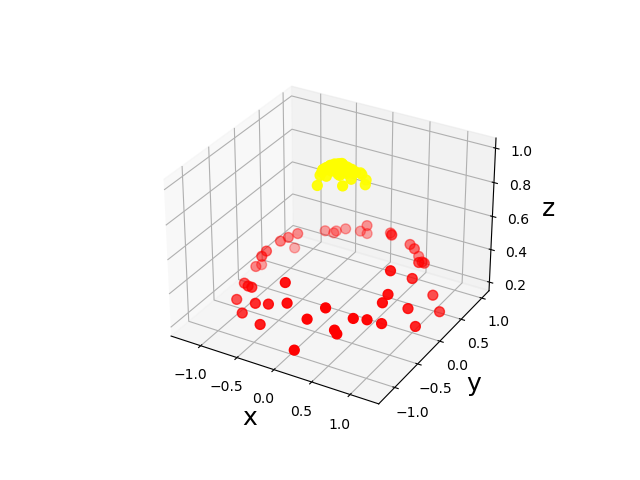

In [44]:
z = np.exp(-(X ** 2).sum(1))  # 加入 z 值
plt.rcParams['figure.figsize']=[9,6]
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D 

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='autumn')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)

#clf = SVC(kernel='rbf', C=1E6)
#clf.fit(X, y)
#plot_svc_decision_function(clf)
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none')

- 從上圖明顯看出多了一個 z 軸維度之後，將原本在 2 維的資料叢(類群)浮出到 3 維度的空間，讓原本環狀分布的資料，因為多了一個維度後，仍然保持環狀分布的情況，在視覺上能有效區分黃色和紅色兩個資料叢(類群)。
- 以 sklearn.svm 模組的 SVC 函數，將原本 kernel 的 `linear` 更改為 `rbf` kernel 參數(Radial Basis Function)，透過 `rbf` 參數可以產生非線性的邊距(Margin)，請參考下圖。
- SVM 的 kernel 將 linear 快速轉換至 nonlinear 方法，在是 SVM 在機器學習分類問題上廣受歡迎的主要原因。

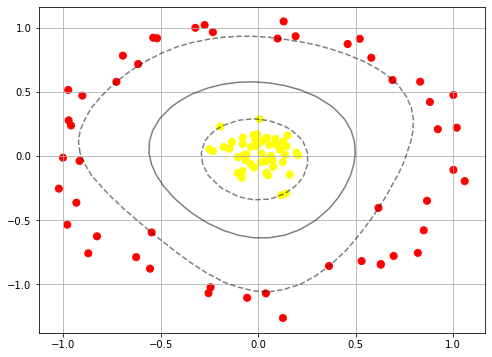

In [9]:
plt.rcParams['figure.figsize']=[8,6]
clf2 = SVC(kernel='rbf', C=1E6)
clf2.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf2)
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1],s=300, lw=1, facecolors='none')
plt.grid(True)

### Tuning the SVM: Soften Margins

- 前述針對 SVM 的探討都假定有一條分隔線可以百分百區隔不同類型資料，但在實際問題上，資料之間難免會有重疊的情況，請看下圖:

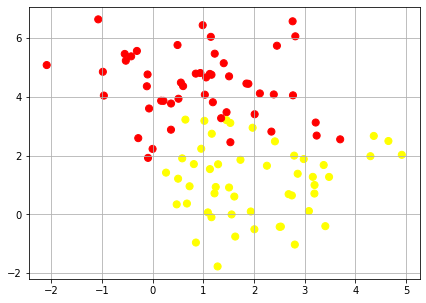

In [74]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.grid(True)

- 當資料類別之間有重疊的情況發生，SVM 允許重疊的部分資料點潛入區隔線的邊距(Margin)，此方法稱為 `softens the margin`。
- sklearn.svm 模組的 SVC 模型以 `C` 的參數調控邊距大小。
    - 參數 `C` 可當成懲罰係數，`C`愈大代表容忍錯誤的程度愈低。
    - 當參數 `C` 值愈大，產生的 Margin 愈寬，Margin 趨向於 `hard`，資料點傾向分布在 Margins 之外。
    - 當參數 `C` 值愈小，產生的 Margin 愈窄，Margin 趨向於 `soft`，資料點傾向分布在 Margins 之間。
- sklearn.svm 模組的 SVC 模型以 `gamma` 參數決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')。

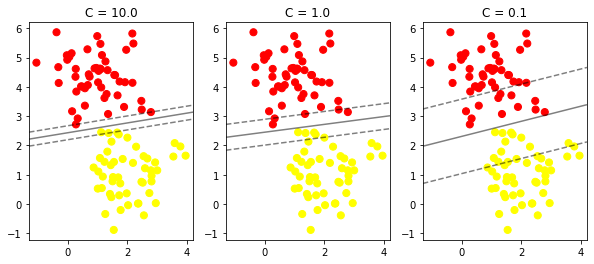

In [33]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(10,4))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 1, 0.05]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)  # 呼叫 plot_svc_decision_function
    #axi.scatter(model.support_vectors_[:, 0],
    #            model.support_vectors_[:, 1],
    #            s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=12)

- 那麼，到底最佳的 `C` 值應該調整為多少? 這必須由資料集的資料決定，可以參考 <a href='https://jason-chen-1992.weebly.com/home/-cross-validation'>cross-validation</a> 的方式求得最佳解。
- 另外，到底資料離邊距 Margin 大或者小，有何重要? 
- 前述已談及`一個 SVC 分類模型會由這些點來決定分類的成敗，所以這些接觸到 Margin 的點在支持向量機模型扮演重要的角色`。此論述意味著僅由少數的點來決定一個模型的分類成果，所以支持向量機是一個相對精簡的模型。
- 也由於僅由靠近 Margins 的資料點影響模型的成效，即使在高維度的模型，在其它機器學習模型難以處理的情況下，支持向量機仍能保有不錯的分類成果。
- sklearn.svm 的 SVC 模型之 `kernel` 參數令模型有 linear 線性/ poly 非線性/ rbf 高維度的多樣化表現。
- 但缺點是可能有特徵遠大於樣本的情況，容易造成過度擬和的問題，且維度過高也容易造成運算上的負擔。

<hr style='border-color:brown; border-width:3px'>

## SVC - iris case

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [76]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [115]:
svc = SVC(kernel='rbf', gamma='scale', C=1)
svc.fit(X_train,y_train)

SVC(C=1)

In [116]:
y_pred = svc.predict(X_test)

In [117]:
from sklearn import metrics
print('預測正確率:', svc.score(X_test, y_test))
print('預測正確率:', metrics.accuracy_score(y_test, y_pred))

預測正確率: 0.9777777777777777
預測正確率: 0.9777777777777777


In [113]:
CList = [1, 10, 50, 100, 200, 500, 1000]
result = []
for c in CList:
    svc = SVC(kernel='poly', gamma='auto', C=c)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    result.append(metrics.accuracy_score(y_test, y_pred))

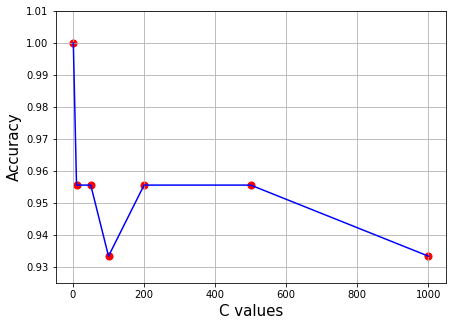

In [114]:
plt.scatter(CList, result, c='r', s=50)
plt.plot(CList, result, c='blue')
plt.xlabel('C values', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0.925, 1.01)
plt.grid(True)

<hr style='border-color:brown; border-width:3px'>

## SVC - 皮膚癌案例

## SVC - 臉部辨識案例